In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [7]:
dataframe = pd.read_csv('/home/deepak/Documents/week3.csv')
def call(row):
    if row['Close Price'] <= row['Bollinger Lower']: return 'Buy'    
    if row['Close Price'] >= row['Bollinger Upper']: return 'Short'
    if row['Close Price'] == row['Bollinger Upper']: return 'Hold'    
    if row['Close Price'] >  row['sma14']:           return 'Hold Buy / Liquidate Short'
    if row['Close Price'] <  row['sma14']:           return 'Hold Short / Liquidate Buy'
    
dataframe['Call'] = dataframe.apply(call, axis=1)
dataframe['Call'].unique()

array([None, 'Hold Short / Liquidate Buy', 'Hold Buy / Liquidate Short',
       'Short', 'Buy'], dtype=object)

In [8]:
dataframe

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,Day_perc_Change,Trend,sma21,sma34,Trade Call,sma14,std14,Bollinger Upper,Bollinger Lower,Call
0,2019-10-24,1780.78,1770.78,1787.97,1760.78,5.20,10,2019,0.000000,Slight or No change,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
1,2019-10-23,1762.17,1761.30,1770.05,1742.00,2.19,10,2019,-1.045048,Negative,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
2,2019-10-22,1765.73,1788.15,1789.78,1762.00,2.23,10,2019,0.202024,Slight or No change,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
3,2019-10-21,1785.66,1769.66,1785.88,1765.00,2.22,10,2019,1.128712,Positive,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
4,2019-10-18,1757.51,1787.80,1793.98,1749.20,3.37,10,2019,-1.576448,Negative,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2017-10-31,1105.28,1109.00,1110.54,1101.12,3.48,10,2017,0.144970,Slight or No change,1136.404762,1146.922647,HODL,1121.845714,13.207933,1148.261580,1095.429849,Hold Short / Liquidate Buy
499,2017-10-30,1110.85,1095.01,1122.79,1093.56,6.61,10,2017,0.503945,Slight positive,1134.003810,1144.577647,HODL,1120.486429,13.296420,1147.079268,1093.893589,Hold Short / Liquidate Buy
500,2017-10-27,1100.95,1058.14,1105.58,1050.55,16.57,10,2017,-0.891209,Slight negative,1129.591905,1142.277941,HODL,1117.890714,13.310828,1144.512371,1091.269058,Hold Short / Liquidate Buy
501,2017-10-26,972.43,980.33,982.90,968.55,5.62,10,2017,-11.673555,Bear drop,1118.953810,1136.341765,HODL,1106.872143,40.842081,1188.556306,1025.187980,Buy


In [23]:

classifiers = OrderedDict([
    ( "Nearest Neighbors", KNeighborsClassifier(max_features) ),
    ( "Linear SVM",        SVC(kernel="linear", C=0.025) ),
    ( "RBF SVM",           SVC(gamma=2, C=1) ),
    ( "Gaussian Process",  GaussianProcessClassifier(1.0 * RBF(1.0)) ),
    ( "Decision Tree",     DecisionTreeClassifier(max_depth=5) ),
    ( "Random Forest",     RandomForestClassifier(max_depth=5, n_estimators=100, max_features=max_features) ),
    ( "Neural Net",        MLPClassifier(alpha=1, max_iter=1000) ),
    ( "AdaBoost",          AdaBoostClassifier() ),
    ( "Naive Bayes",       GaussianNB() ),
    ( "QDA",               QuadraticDiscriminantAnalysis() ),
])

In [21]:

scaler = StandardScaler()

X = dataframe.dropna()[['Close Price', 'sma14', 'Bollinger Upper', 'Bollinger Lower']]
y = dataframe.dropna()['Call']    
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 1)

max_features = len(y.unique())
encoder      = LabelEncoder()


In [24]:
scores = {}
for (name, classifier) in classifiers.items():
  classifier.fit(X_train, y_train)
  scores[name] = classifier.score(X_test, y_test)
    
scores = OrderedDict(sorted(scores.items(), key=lambda x: x[1]))
scores

/home/deepak/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


OrderedDict([('Naive Bayes', 0.4166666666666667),
             ('Linear SVM', 0.6089743589743589),
             ('AdaBoost', 0.6858974358974359),
             ('Decision Tree', 0.7692307692307693),
             ('Random Forest', 0.8141025641025641),
             ('Nearest Neighbors', 0.8461538461538461),
             ('RBF SVM', 0.8653846153846154),
             ('Neural Net', 0.9038461538461539),
             ('QDA', 0.9038461538461539),
             ('Gaussian Process', 0.9551282051282052)])

In [27]:
tcs = pd.read_csv("/home/deepak/Documents/ML-Intern/Large_Cap/TCS.csv",  parse_dates=['Date'])
tcs.set_index('Date', drop=False, inplace=True)
tcs['sma14'] = tcs['Close Price'].rolling(14).mean()
tcs['std14'] = tcs['Close Price'].rolling(14).std()
tcs['Bollinger Upper'] = tcs['sma14'] + tcs['std14']*2
tcs['Bollinger Lower'] = tcs['sma14'] - tcs['std14']*2
# fit_transform() breaks if NA is present
tcs  = tcs.dropna()  
tcs_X = scaler.fit_transform( tcs[['Close Price', 'sma14', 'Bollinger Upper', 'Bollinger Lower']] )
tcs['Call']      = classifiers['Gaussian Process'].predict( tcs_X )  # using previously trained Gaussian Process
tcs['Call_Code'] = encoder.fit(tcs['Call']).transform(tcs['Call'])

tcs.to_csv('/home/deepak/Documents/ML-Intern/Large_Cap/TCS.csv');

print( "tcs['Call'].unique() = ", tcs['Call'].unique() )
tcs.head()

tcs['Call'].unique() =  ['Hold Buy / Liquidate Short' 'Hold Short / Liquidate Buy' 'Buy']


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma14,std14,Bollinger Upper,Bollinger Lower,Call,Call_Code
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,TCS,EQ,2017-06-01,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,...,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815,Hold Buy / Liquidate Short,1
2017-06-02,TCS,EQ,2017-06-02,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,...,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462,Hold Buy / Liquidate Short,1
2017-06-05,TCS,EQ,2017-06-05,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,...,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683,Hold Buy / Liquidate Short,1
2017-06-06,TCS,EQ,2017-06-06,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,...,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192,Hold Buy / Liquidate Short,1
2017-06-07,TCS,EQ,2017-06-07,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,...,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794,Hold Buy / Liquidate Short,1


In [99]:
## 4.2
bf = pd.read_csv('/home/deepak/Documents/ML-Intern/Large_Cap/BAJFINANCE.csv', parse_dates=['Date'])
bf.set_index('Date', drop=False, inplace=True)

bf['pc_Open_Close'] = ( bf['Close Price'] - bf['Open Price'] ) / bf['Open Price']
bf['pc_High_Low']   = ( bf['High Price']  - bf['Low Price']  ) / bf['Low Price']
bf['5_day_mean']    = bf['Close Price'].pct_change().rolling(5).mean()
bf['5_day_std']     = bf['Close Price'].pct_change().rolling(5).std()
bf.dropna(inplace=True)

# Create a new column 'Action' whose values are: 

# reset
bf.reset_index(drop=True, inplace=True)  

for index, present_day in df.iterrows():
    try:
        next_day = bf.iloc[index+1]    
        if   next_day['Close Price'] > present_day['Close Price']: 
            action_value =  1
        elif next_day['Close Price'] < present_day['Close Price']: 
            action_value = -1
        else:                                               
            action_value =  0
        bf.at[index, 'Action'] = action_value;         
    except: 
        pass 
bf.set_index('Date', drop=False, inplace=True)  # Restore index

bf.to_csv('/home/deepak/Documents/ML-Intern/Large_Cap/BAJFINANCE11.csv')
bf

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pc_Open_Close,pc_High_Low,5_day_mean,5_day_std,Action
Date,,,,,,,,,,,,,,,,,,,,
2017-05-22,BAJFINANCE,EQ,2017-05-22,1289.15,1299.0,1304.00,1237.35,1240.00,1242.15,1264.99,873873,1.105444e+09,39772,391500,44.80,-0.043764,0.053865,-0.013889,0.017401,-1.0
2017-05-23,BAJFINANCE,EQ,2017-05-23,1242.15,1249.9,1265.00,1190.55,1230.70,1233.75,1231.01,1348383,1.659868e+09,60446,466036,34.56,-0.012921,0.062534,-0.017462,0.011975,-1.0
2017-05-24,BAJFINANCE,EQ,2017-05-24,1233.75,1234.0,1254.90,1210.00,1225.00,1224.35,1231.39,787101,9.692307e+08,42989,266289,33.83,-0.007820,0.037107,-0.015580,0.012772,-1.0
2017-05-25,BAJFINANCE,EQ,2017-05-25,1224.35,1230.0,1268.00,1228.25,1263.00,1258.85,1250.15,905807,1.132395e+09,38094,349445,38.58,0.023455,0.032363,-0.008397,0.023706,-1.0
2017-05-26,BAJFINANCE,EQ,2017-05-26,1258.85,1261.7,1326.70,1261.70,1314.85,1317.80,1305.26,1306793,1.705702e+09,40302,456603,34.94,0.044464,0.051518,0.004833,0.032799,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,BAJFINANCE,EQ,2019-05-07,3034.30,3052.9,3069.80,3007.60,3023.00,3017.05,3041.32,970264,2.950886e+09,56586,233523,24.07,-0.011743,0.020681,-0.005137,0.013187,1.0
2019-05-08,BAJFINANCE,EQ,2019-05-08,3017.05,3012.0,3017.00,2900.00,2910.00,2921.30,2969.30,1155023,3.429605e+09,70959,375292,32.49,-0.030113,0.040345,-0.011427,0.017189,1.0
2019-05-09,BAJFINANCE,EQ,2019-05-09,2921.30,2900.0,2991.80,2885.00,2969.00,2971.35,2951.93,1745234,5.151803e+09,92225,369765,21.19,0.024603,0.037019,-0.010313,0.019123,1.0


In [100]:
X = bf.dropna()[['pc_Open_Close', 'pc_High_Low', '5_day_mean', '5_day_std']]
y = bf.dropna()['Action']  
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

random_forest = RandomForestClassifier(n_estimators=100, max_features=2)
random_forest

RandomForestClassifier(max_features=2)

In [101]:
random_forest.fit(X_train,  y_train)
random_forest.score(X_test, y_test)

0.6728395061728395

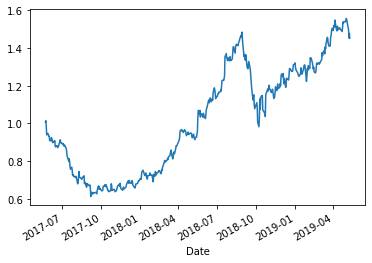

In [102]:
## Cumulative 
cumulative_returns = (1+(bf['Close Price'].pct_change() * bf['Action']) ).dropna().cumprod()

# 
(cumulative_returns).plot()